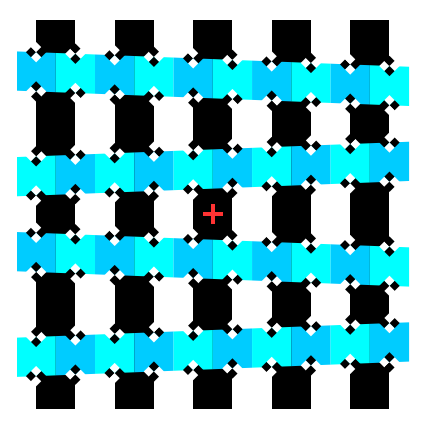

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr  1 19:52:57 2017

@author: ѩ
"""
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator
%matplotlib inline 
# show the figures inside the page?
import numpy as np
import os
from os import listdir
from os.path import isfile,join
# why we already import os,
#we still need to import sth use "from os import *" sentence
from scipy import ndimage
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.image as mpimg
from PIL import Image
from ipywidgets import FloatSlider, RadioButtons, Text, Button, HBox, VBox, interactive, HTML, ToggleButtons, ToggleButton, Layout
from IPython.display import display

## Illusion parameters (default values) 
# width of blue horizontal lines/ black vertical lines
dist=1.
# interval of blue lines
dist2=1.3
# ratio  of and the size of black & white diamonds
default_r=0.1
r=default_r
r_range=[0.04,0.07,0.1,0.13,0.16]
radius=r*dist
# distortion 
default_distort=0.0
distort=-0.0#3
# background color
color_background=["#000000","#ffffff"]
c_bg=color_background
# front color
default_c_ft=["#00ffff","#0000ff"]
color_front=default_c_ft
c_ft_range=[["#00ffff","#0000ff"],
			["#0033ff","#0000ff"],
			["#00ffff","#00ccff"]]
c_ft=color_front


# Folder where images are stored 
images_folder = "blue_horizontal_line_img"
if not os.path.exists(images_folder):
    os.makedirs(images_folder)
    
# If true, will keep redrawing pattern every time a user interacts with the illusion 
force_replot = False 

illusion_variations = {}
n_r=len(r_range)
n_c_ft=len(c_ft_range)
for i_r in range(n_r):
	for i_c_ft in range(n_c_ft):
		illusion_variations[i_r*n_c_ft+i_c_ft] = {"variation_ID": i_r*n_c_ft+i_c_ft+1,"r": r_range[i_r],"c_ft": c_ft_range[i_c_ft]}

illusion_variation_dict = {} 
illusion_count = len(illusion_variations)		
illusions_to_modify = list(illusion_variations.keys())      
default_parameters = {
    "variation_ID": None, 
    "r": None,  
    "c_ft":None
}

# Create a dictionary with default parameters
for i in illusions_to_modify: 
    illusion_variation_dict[i] = default_parameters.copy()

def add_variation(param_dict): 
    # Randomize order of illusions 
    # Pick a random number, and change the illusion parameters to get different illusion variations 
    num = np.random.choice(illusions_to_modify, replace=False)
    illusions_to_modify.remove(num)
    for key, value in param_dict.items(): 
        illusion_variation_dict[num][key] = value
# Modify the parameters according to our illusion variations 
for variation in illusion_variations.values(): 
    add_variation(variation)

# Make sure number of illusions adds upnum
assert not illusions_to_modify


## Create some sliders and buttons 
distort_slider = FloatSlider(
	min=-radius*10,
	max=radius*10,
	step=radius/100, 
	value=default_distort, 
    description="Distort:",
	readout=True, 
	continuous_update=False,
	readout_format='.3f',
)

selector = ToggleButtons(
    options=list(illusion_variation_dict.keys()),
    description='Variation:',
    disabled=False,
    button_style='', 
	tooltip='Description',
    value=2
)

def reset_distort(button): 
    # randomize slider min, max and starting value for every illusion switch 
    # (to avoid the subject remembering the values from previously completed illusion variations)
    distort_slider.min = np.random.uniform(-radius*3, -radius*2.4)
    distort_slider.max = np.random.uniform(radius*2.4, radius*3)
    distort_slider.value = np.random.uniform(distort_slider.min, distort_slider.max) 
    
selector.observe(reset_distort, "value")#?????

user_name = Text(
    value='',
    placeholder='Please enter your ETH username.',
    description='Name:',
    disabled=False
)
checkbox = RadioButtons(
    options={'No':2, 'Yes':3},
    description='Do the blue lines appear parallel?',
    value=2#try to commet this line
)

submit_button = ToggleButton(
    description='Submit data',
    disabled=False,
    button_style='',
    tooltip='Submit data',
    icon='check'
)

input_widgets = [user_name, checkbox, submit_button]



def illusion_plot(dist,dist2,radius,c_ft,distort):
    fig = plt.figure(dpi=130)
    layer1 = fig.add_subplot(111, aspect='equal')
    x_pos_pole=0.
    y_pos_pole=0.
    x_width_pole=dist
    y_width_pole=6*dist+3*dist2
    for i_pole in range(5):
        x_pos_pole=0.+i_pole*2*x_width_pole  
        p=patches.Rectangle((x_pos_pole, y_pos_pole), \
                            x_width_pole, y_width_pole,facecolor=c_bg[0],alpha=1)     # No background
        layer1.add_patch(p)
        for l in range(4):
            distortion_left=distort*(i_pole*2-5)*(l%2*2-1)
            distortion_middle=distort*(i_pole*2-4)*(l%2*2-1)
            distortion_right=distort*(i_pole*2-3)*(l%2*2-1)
            bottom_y_pos=dist+l*(dist+dist2)
            top_y_pos=2*dist+l*(dist+dist2)
            bottom_left_pos=[x_pos_pole-dist*0.5,bottom_y_pos+distortion_left]
            top_left_pos=[x_pos_pole-dist*0.5,top_y_pos+distortion_left]
            bottom_middle_pos=[x_pos_pole+dist*0.5,bottom_y_pos+distortion_middle]
            top_middle_pos=[x_pos_pole+dist*0.5,top_y_pos+distortion_middle]
            bottom_right_pos=[x_pos_pole+dist*1.5,bottom_y_pos+distortion_right]
            top_right_pos=[x_pos_pole+dist*1.5,top_y_pos+distortion_right]
            
            polygon1 = patches.Polygon([bottom_left_pos, bottom_middle_pos, 
                                top_middle_pos, top_left_pos], 
                                facecolor=c_ft[(i_pole*2+l)%2]
                                
                                )
            polygon2 = patches.Polygon([bottom_middle_pos, bottom_right_pos, 
                                top_right_pos, top_middle_pos], 
                                facecolor=c_ft[(i_pole*2+l+1)%2]
                                
                                )
            layer1.add_patch(polygon1)
            layer1.add_patch(polygon2)
         
            x_pos_s=[x_pos_pole,x_pos_pole+x_width_pole]
            #y_pos_s=0.5*[(bottom_y_pos+distortion_left+bottom_y_pos+distortion_middle),(bottom_y_pos+distortion_middle+bottom_y_pos+distortion_right)]
            
            for j in range(2):
            
                x_pos_s1=x_pos_s[j]+radius
                y_pos_s1=bottom_y_pos+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s1=patches.RegularPolygon( (x_pos_s1, y_pos_s1),4,\
                                          radius,facecolor=c_bg[(l+j)%2])
                                      
                layer1.add_patch(s1)
            
                x_pos_s2=x_pos_s[j]-radius
                y_pos_s2=bottom_y_pos+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s2=patches.RegularPolygon( (x_pos_s2, y_pos_s2),4,\
                                      radius,facecolor=c_bg[(l+j)%2])
                layer1.add_patch(s2)
            
                x_pos_s3=x_pos_s[j]
                y_pos_s3=bottom_y_pos-radius+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s3=patches.RegularPolygon( (x_pos_s3, y_pos_s3),4,\
                                      radius,facecolor=c_bg[(l+j+1)%2])
                layer1.add_patch(s3)
            
                x_pos_s4=x_pos_s[j]
                y_pos_s4=bottom_y_pos+radius+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s4=patches.RegularPolygon( (x_pos_s4, y_pos_s4),4,\
                                      radius,facecolor=c_bg[(l+j+1)%2])
                layer1.add_patch(s4)
            
                x_pos_s5=x_pos_s[j]+radius
                y_pos_s5=top_y_pos+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s5=patches.RegularPolygon( (x_pos_s5, y_pos_s5),4,\
                                      radius,facecolor=c_bg[(l+j+1)%2]
                                      )
                layer1.add_patch(s5)
            
                x_pos_s6=x_pos_s[j]-radius
                y_pos_s6=top_y_pos+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s6=patches.RegularPolygon( (x_pos_s6, y_pos_s6),4,\
                                      radius,facecolor=c_bg[(l+j+1)%2]
                                      )
                layer1.add_patch(s6)
         
                x_pos_s7=x_pos_s[j]
                y_pos_s7=top_y_pos-radius+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s7=patches.RegularPolygon( (x_pos_s7, y_pos_s7),4,\
                                      radius,facecolor=c_bg[(l+j)%2])
                layer1.add_patch(s7)
            
                x_pos_s8=x_pos_s[j]
                y_pos_s8=top_y_pos+radius+(distortion_left+distortion_middle)/2+distort*j*(l%2*2-1)
                s8=patches.RegularPolygon( (x_pos_s8, y_pos_s8),4,\
                                      radius,facecolor=c_bg[(l+j)%2])
                layer1.add_patch(s8)
    
    
    
    
    red_h=patches.Rectangle((4.25*dist, 3*dist+1.46*dist2), \
                            0.5*dist,0.08*dist2,facecolor='#ff3333',alpha=1)
    red_v=patches.Rectangle((4.5*dist-0.04*dist2, 2.75*dist+1.5*dist2), \
                            0.08*dist2,0.5*dist,facecolor='#ff3333',alpha=1)
    layer1.add_patch(red_h)
    layer1.add_patch(red_v)
    #layer1.scatter([4.5*dist],[5*dist],color='#a10000', marker="+",s=150, lw=2, zorder=1)
    
    total_figure_size=10*dist
    axes = plt.gca()
    axes.set_xlim([0-dist/2,total_figure_size])
    axes.set_ylim([0,total_figure_size])
    plt.axis('off')
    axes.xaxis.set_major_locator(NullLocator())
    axes.yaxis.set_major_locator(NullLocator()) 
    return fig


def draw_figure(illusion_selector=0, distort=default_distort, save_figure=False):
	
	
	# Load the parameters for the selected illusion 
    params_dict = illusion_variation_dict[illusion_selector]    
    radius = params_dict["r"]*dist
    c_ft = params_dict["c_ft"]
    variation_ID = params_dict["variation_ID"]
    
    
    fig=illusion_plot(dist,dist2,radius,c_ft,distort)        

		
	### For submitting data 
    if save_figure:
        # Submit button is pressed
        # Check if the user entered his info 
        if user_name.value.strip() == '':
            submit_button.button_style = "danger"
            submit_button.description = "Please enter username!"
        else: 
            submit_button.button_style = ""
            submit_button.description = "Submitted. Again?"
            values_to_save = {
                "variation_ID": variation_ID, 
				"color_front":c_ft, 
				"radius": radius, 
                "distort": distort,
                "user":user_name.value, 
                "annihilated":"true" if checkbox.value == 3 else "false"
            }
            filename = ""
            # Format the filename with the illusion parameters. 
            for key, value in values_to_save.items(): 
                filename += "{}={}_".format(key, value)
            # make sure you have an 'blue_horizontal_line_img' folder if you're running this locally
            fig.savefig('{}/blue_horizontal_lines_{}.png'.format(images_folder, filename), bbox_inches='tight', pad_inches=0)     

    submit_button.value = False 

    
    
# User instructions
display(HTML(
    value="<h2>Blue Horizontal Lines Illusion</h2><p>" +
        "Focus your attention on <b style=\"color:red\">the red cross</b> in the centre of this image. "+
    "Your task is to change the distort slider until all the "+
        " Blue lines appear parallel (you can also use the arrow keys). When they look parallel, fill out the form and " + 
    "press the \"Submit data\" button on the right. Complete this task for each of the variations of this illusion listed below. "+
        "After that please compact the generated pics in folder \" blue_horizontal_line_img \" and send it to <b style=\"color:blue\">xrui@student.ethz.ch</p> "
))
# Make the draw function interactive (will re-render the illusion on slider change)
widget = interactive(draw_figure, illusion_selector=selector, 
                     distort=distort_slider, save_figure=submit_button, __manual=False)

# Arrange sliders side by side 
box = HBox([VBox([VBox(), VBox(widget.children[:-1], width="40%")]), VBox([HTML(value="<h4>Submission form:</h4>")] + input_widgets)])
display(box) 
selector.value = 0


